In [12]:
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy import linalg
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from confusion_matrix import confusion_matrix

import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
# Load training data
train_data = pd.read_csv("../TrainingData/neodata/fault_all_2000.csv")

test_data = pd.read_csv("../ValidationData/neodata/fault_all_6000.csv")

train_data.head()

,Pdis,Psuc,T0,Tc,Tdis,Tret,Tsuc,Tsh,Tsup,CondFan,CprPower,Density,Tamb,Tset,target
0,7.949952,2.668353,-2.535944,31.107156,46.518367,5.159241,3.150524,5.686499,0.022096,45.635069,1114.722686,5.990809,10,0,0
1,7.949957,2.668346,-2.536014,31.107179,46.518514,5.159215,3.150492,5.686537,0.022045,45.635322,1114.735606,5.990794,10,0,0
2,7.949963,2.668339,-2.536083,31.107202,46.518661,5.159190,3.150461,5.686575,0.021994,45.635575,1114.748496,5.990779,10,0,0
3,7.949968,2.668332,-2.536152,31.107224,46.518808,5.159164,3.150430,5.686613,0.021944,45.635827,1114.761356,5.990764,10,0,0
4,7.949973,2.668325,-2.536220,31.107247,46.518954,5.159139,3.150399,5.686650,0.021894,45.636079,1114.774187,5.990749,10,0,0


In [14]:
#adding noise
mean = 0
variance = 2

#For the training data
for column in train_data.drop(['target','Tset'],axis=1): #Don't add noise to the labels, and the set temperature
        noise = np.random.normal(mean,variance,len(train_data))
        train_data[column] += noise

#noising the validation data as well
for column in test_data.drop(['target','Tset'],axis=1):
        noise = np.random.normal(mean,variance,len(test_data))
        test_data[column] += noise


train_data

,Pdis,Psuc,T0,Tc,Tdis,Tret,Tsuc,Tsh,Tsup,CondFan,CprPower,Density,Tamb,Tset,target
0,11.558940,-0.277498,-6.824185,32.294010,49.686158,3.157474,5.023630,6.437909,1.257823,43.815299,1115.436769,9.720663,11.045333,0,0
1,9.224671,3.890154,-4.444066,31.245881,47.896910,5.080179,3.394113,7.957789,1.955500,45.399185,1112.547604,8.749307,10.901861,0,0
2,7.175655,2.549442,-2.930957,36.094852,46.032480,1.971262,3.185099,4.827536,1.818666,44.498046,1115.995983,4.032217,11.022111,0,0
3,5.800283,3.418929,-2.981603,32.301497,46.093387,5.503398,0.213806,3.045469,2.075884,44.598021,1112.312085,4.438478,9.161807,0,0
4,7.249167,5.091550,-1.018285,31.154395,47.272539,3.577246,4.890331,6.617788,0.193595,48.514568,1116.947298,5.536022,6.371260,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,10.128527,4.739125,2.148261,46.247233,72.614871,23.909156,20.039963,13.552954,12.910402,28.739076,5674.493799,9.200901,30.408027,12,20
749996,11.559965,4.128746,3.687744,53.303403,71.127161,22.860379,17.640902,14.692784,13.757469,28.133011,5670.069865,2.447355,31.018651,12,20
749997,13.511462,1.733041,4.613079,49.749389,69.323903,20.619409,16.466399,12.706991,11.437787,27.293355,5670.146760,9.225344,29.609500,12,20
749998,11.880790,-0.866075,3.704827,46.171799,68.497857,23.601262,18.434849,16.096347,7.830335,29.585613,5668.817659,10.993409,28.735632,12,20


Text(0.5, 1.0, 'Training data')

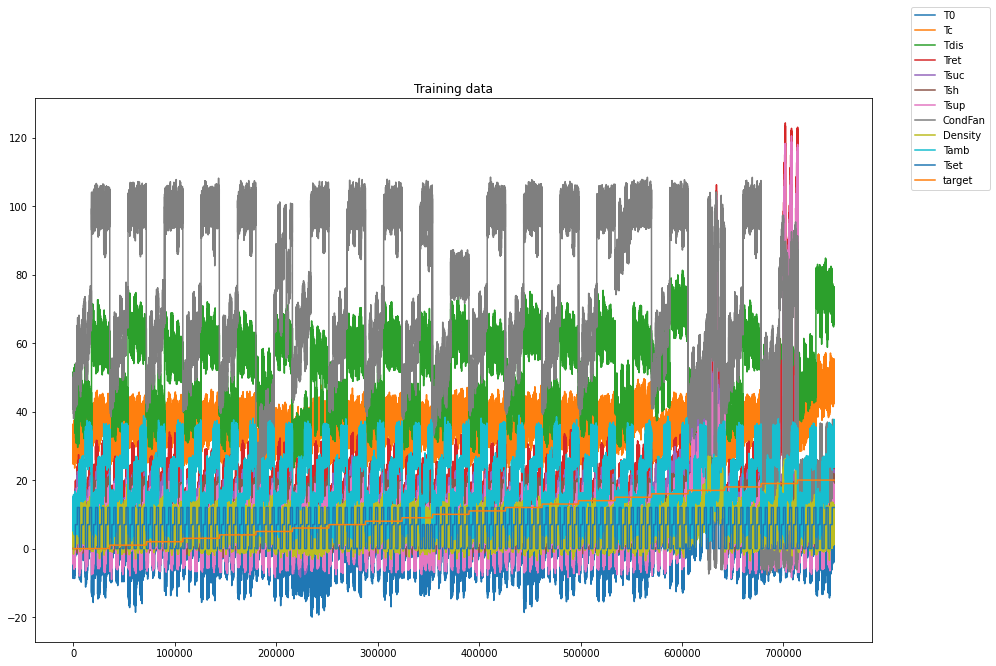

In [15]:
fig, axs = plt.subplots(figsize=(15,10))

#easier to see most data without Pdis, Psuc, CprPower
axs.plot(train_data.drop(['Pdis','Psuc','CprPower'],axis=1))
plt.legend(train_data.drop(['Pdis','Psuc','CprPower'],axis=1).keys(), bbox_to_anchor=(1.04, 1), loc="center left")
plt.title('Training data')

In [16]:
#standardization
standardize = True 

if standardize:
    import standardization as sd

    # Normalization / conditioning
    standardizer = sd.standardization(train_data,'target')

    trn = standardizer.transform(train_data)
    tst = standardizer.transform(test_data)
else:
    trn = train_data
    tst = test_data

targets = train_data['target'].unique().tolist()
labels_trn = train_data['target']
labels_tst = test_data['target']

trn

,Pdis,Psuc,T0,Tc,Tdis,Tret,Tsuc,Tsh,Tsup,CondFan,CprPower,Density,Tamb,Tset,target
0,1.210368,-1.517654,-1.004548,-0.653725,-0.090105,-1.116570,-0.774315,-0.888469,-0.626747,-1.102827,-0.857464,0.874885,-1.065684,-1.279353,0
1,0.149736,0.300679,-0.718127,-0.910178,-0.244347,-0.973920,-0.956642,-0.549141,-0.566888,-1.041224,-0.859203,0.556684,-1.082751,-1.279353,0
2,-0.781284,-0.284269,-0.536041,0.276254,-0.405070,-1.204578,-0.980029,-1.248001,-0.578628,-1.076273,-0.857127,-0.988562,-1.068447,-1.279353,0
3,-1.406217,0.095085,-0.542136,-0.651893,-0.399820,-0.942520,-1.312489,-1.645865,-0.556560,-1.072384,-0.859345,-0.855477,-1.289736,-1.279353,0
4,-0.747882,0.824844,-0.305872,-0.932562,-0.298171,-1.085426,-0.789230,-0.848309,-0.718056,-0.920056,-0.856554,-0.495939,-1.621680,-1.279353,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,0.560425,0.671082,0.075187,2.760307,1.886465,0.423046,0.905871,0.700035,0.373015,-1.689194,1.887585,0.704619,1.237568,1.162160,20
749996,1.210834,0.404776,0.260446,4.486789,1.758217,0.345235,0.637438,0.954514,0.445691,-1.712765,1.884921,-1.507738,1.310204,1.162160,20
749997,2.097544,-0.640462,0.371800,3.617204,1.602767,0.178972,0.506023,0.511166,0.246668,-1.745423,1.884967,0.712626,1.142581,1.162160,20
749998,1.356609,-1.774448,0.262502,2.741850,1.531558,0.400203,0.726274,1.267873,-0.062842,-1.656269,1.884167,1.291817,1.038632,1.162160,20


In [17]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(5,)) # only 5 neurons and 1 hidden layer :O

clf.fit(trn,labels_trn)

MLPClassifier(hidden_layer_sizes=(5,))

# How it fits the training data

In [18]:
predict = clf.predict(trn)
print("accurary: {}%".format(clf.score(trn,labels_trn)*100))

accurary: 99.9932%


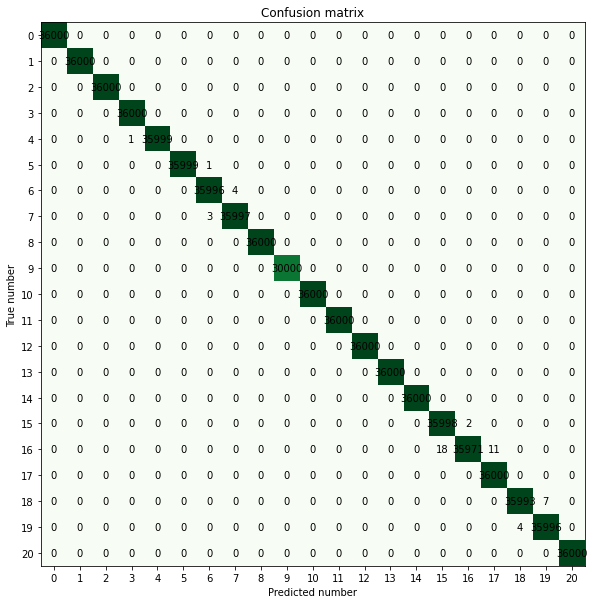

In [19]:
#confusion matrix
numbers = targets
truth = labels_trn


# Initialize empty confusion matrix
conf_matrix = np.zeros((len(numbers),len(numbers)))

# Iterate through each prediction and update confusion matrix accordingly
for i in range(len(predict)):
    #print(int(truth[i]))
    conf_matrix[numbers.index(int(truth[i])),numbers.index(int(predict[i]))] += 1

#plot the confusion matrix

fig , axs = plt.subplots(figsize=(10,10))
axs.imshow(conf_matrix,cmap="Greens")
axs.set_xlabel("Predicted number")
axs.set_ylabel("True number")
axs.set_title("Confusion matrix")
plt.yticks(numbers)
plt.xticks(numbers)

width, height = conf_matrix.shape

for x in range(width):
    for y in range(height):
        axs.annotate(str(int(conf_matrix[x][y])), xy=(y, x), 
            horizontalalignment='center',
            verticalalignment='center')

# Validation on test set

In [21]:
predict = clf.predict(tst)
print("accurary: {}%".format(clf.score(tst,labels_tst)*100))

accurary: 99.66428571428571%


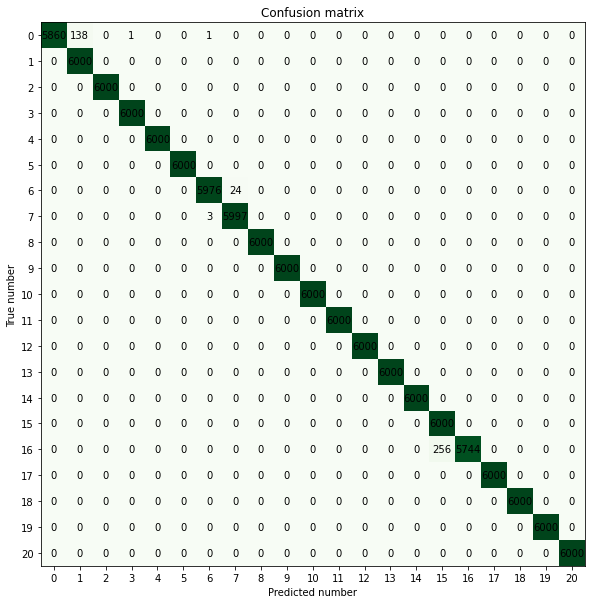

In [22]:
#confusion matrix
numbers = targets
truth = labels_tst


# Initialize empty confusion matrix
conf_matrix = np.zeros((len(numbers),len(numbers)))

# Iterate through each prediction and update confusion matrix accordingly
for i in range(len(predict)):
    #print(int(truth[i]))
    conf_matrix[numbers.index(int(truth[i])),numbers.index(int(predict[i]))] += 1

#plot the confusion matrix

fig , axs = plt.subplots(figsize=(10,10))
axs.imshow(conf_matrix,cmap="Greens")
axs.set_xlabel("Predicted number")
axs.set_ylabel("True number")
axs.set_title("Confusion matrix")
plt.yticks(numbers)
plt.xticks(numbers)

width, height = conf_matrix.shape

for x in range(width):
    for y in range(height):
        axs.annotate(str(int(conf_matrix[x][y])), xy=(y, x), 
            horizontalalignment='center',
            verticalalignment='center')